In [1]:
import pandas as pd
df=pd.read_csv("C:\jupython\(공모전)환경데이터공모전\최종\결과값\관광지만\제주도_격자_tour.csv")
df.head()

,gid,center_lat,center_lon,Usage,Usage_n,Dist,Dist_n,Pop,Pop_n,Pop_s,...,c,c_n,d,d_n,e,e_n,f,f_n,Weight,geometry
0,나나74a80b,874250.0,1480750.0,0.0,0.0,1423.466728,0.134869,0.000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.002088,0.028662,"POLYGON ((874000 1480500, 874000 1481000, 8745..."
1,나나75b78a,875750.0,1478250.0,0.0,0.0,1468.865487,0.139203,0.000,0.000000,97.0,...,3.0,0.065217,0.0,0.0,0.0,0.0,0.0,0.000000,0.033370,"POLYGON ((875500 1478000, 875500 1478500, 8760..."
2,나나75b78b,875750.0,1478750.0,0.0,0.0,1691.043241,0.160417,53.215,0.004156,14.0,...,1.0,0.021739,0.0,0.0,0.0,0.0,2.0,0.004175,0.038569,"POLYGON ((875500 1478500, 875500 1479000, 8760..."
3,나나75b79a,875750.0,1479250.0,0.0,0.0,1192.488258,0.112815,0.000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.002088,0.025238,"POLYGON ((875500 1479000, 875500 1479500, 8760..."
4,나나75b79b,875750.0,1479750.0,0.0,0.0,696.160040,0.065426,33.120,0.002586,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.002088,0.018509,"POLYGON ((875500 1479500, 875500 1480000, 8760..."


In [2]:
df.info() # 변수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         1032 non-null   object 
 1   center_lat  1032 non-null   float64
 2   center_lon  1032 non-null   float64
 3   Usage       1032 non-null   float64
 4   Usage_n     1032 non-null   float64
 5   Dist        1032 non-null   float64
 6   Dist_n      1032 non-null   float64
 7   Pop         1032 non-null   float64
 8   Pop_n       1032 non-null   float64
 9   Pop_s       1032 non-null   float64
 10  Pop_s_n     1032 non-null   float64
 11  build       1032 non-null   float64
 12  build_n     1032 non-null   float64
 13  a           1032 non-null   float64
 14  a_n         1032 non-null   float64
 15  b           1032 non-null   float64
 16  b_n         1032 non-null   float64
 17  c           1032 non-null   float64
 18  c_n         1032 non-null   float64
 19  d           1032 non-null  

In [3]:
가중치데이터프레임 = pd.DataFrame(
    {"a_w": [0.018],
     "b_w": [0.020],
     "c_w": [0.019],
     "d_w": [0.018],
     "e_w": [0.020],
     "f_w": [0.018],
     "Pop_s_w": [0.083],
     "Pop_w": [0.089],
     "build_w": [0.367],
     "Usage_w": [0.144],
     "Dist_w": [0.204]}
)
total_weight = 가중치데이터프레임.sum(axis=1)

In [4]:
가중치데이터프레임

,a_w,b_w,c_w,d_w,e_w,f_w,Pop_s_w,Pop_w,build_w,Usage_w,Dist_w
0,0.018,0.02,0.019,0.018,0.02,0.018,0.083,0.089,0.367,0.144,0.204


In [5]:
total_weight # 합이 1인지 확인인

0    1.0
dtype: float64

In [6]:
df=df.assign(a_n_w=df['a_n']*0.018,
         b_n_w=df["b_n"]*0.02,
         c_n_w=df["c_n"]*0.019,
         d_n_w=df["f_n"]*0.018,
         e_n_w=df["e_n"]*0.02,
         f_n_w=df["f_n"]*0.018,
         Pop_n_w=df["Pop_n"]*0.089,
         Pop_s_n_w=df["Pop_s_n"]*0.083,
         build_n_w=df["build_n"]*0.367,
         Usage_n_w=df["Usage_n"]*0.144,
         Dist_n_w=df["Dist_n"]*0.204)

In [7]:
df["W"]=df["a_n_w"]+df["b_n_w"]+df["c_n_w"]+df["d_n_w"]+df["e_n_w"]\
            +df["f_n_w"]+df["Pop_n_w"]+df["Pop_s_n_w"]+df["build_n_w"]\
            +df["Dist_n_w"]+df["Usage_n_w"]

In [8]:
df[["Weight","W"]].head()

,Weight,W
0,0.028662,0.028699
1,0.033370,0.033370
2,0.038569,0.038645
3,0.025238,0.025275
4,0.018509,0.018546


In [9]:
df.sort_values("Weight",ascending=False)["Weight"].head()

856    0.394351
499    0.244389
255    0.240815
870    0.214322
135    0.206429
Name: Weight, dtype: float64

In [10]:
df.sort_values("W",ascending=False)["W"].head()

856    0.394614
255    0.240815
499    0.238511
870    0.212850
874    0.208293
Name: W, dtype: float64

In [11]:
df.head()

,gid,center_lat,center_lon,Usage,Usage_n,Dist,Dist_n,Pop,Pop_n,Pop_s,...,c_n_w,d_n_w,e_n_w,f_n_w,Pop_n_w,Pop_s_n_w,build_n_w,Usage_n_w,Dist_n_w,W
0,나나74a80b,874250.0,1480750.0,0.0,0.0,1423.466728,0.134869,0.000,0.000000,0.0,...,0.000000,0.000038,0.0,0.000038,0.00000,0.000000,0.000000,0.0,0.027513,0.028699
1,나나75b78a,875750.0,1478250.0,0.0,0.0,1468.865487,0.139203,0.000,0.000000,97.0,...,0.001239,0.000000,0.0,0.000000,0.00000,0.001130,0.001311,0.0,0.028397,0.033370
2,나나75b78b,875750.0,1478750.0,0.0,0.0,1691.043241,0.160417,53.215,0.004156,14.0,...,0.000413,0.000075,0.0,0.000075,0.00037,0.000163,0.002419,0.0,0.032725,0.038645
3,나나75b79a,875750.0,1479250.0,0.0,0.0,1192.488258,0.112815,0.000,0.000000,0.0,...,0.000000,0.000038,0.0,0.000038,0.00000,0.000000,0.001075,0.0,0.023014,0.025275
4,나나75b79b,875750.0,1479750.0,0.0,0.0,696.160040,0.065426,33.120,0.002586,0.0,...,0.000000,0.000038,0.0,0.000038,0.00023,0.000000,0.003783,0.0,0.013347,0.018546


# K-means #
---
## **가중치 변수 사용** ##

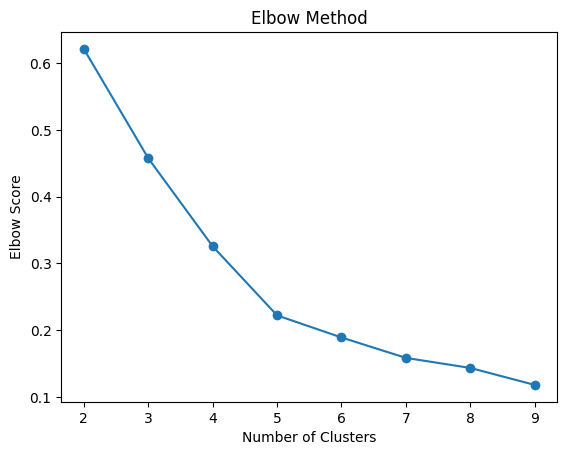

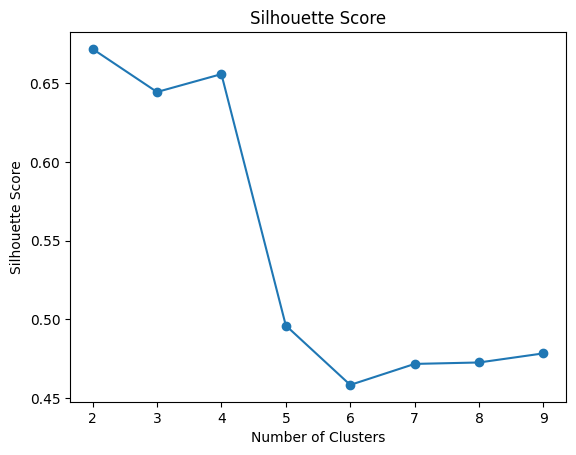

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 클러스터링에 사용할 특성(변수) 리스트 정의
features = ['a_n_w', 'b_n_w', 'c_n_w', 'd_n_w', 'e_n_w', 'f_n_w', 'Dist_n_w', 'Pop_n_w', 'build_n_w',"Pop_s_n_w","Usage_n_w"]

# 특성 데이터 추출
data = df[features]

# 클러스터 개수 범위 설정
cluster_range = range(2, 10)
elbow_scores = []
silhouette_scores = []

# 클러스터 개수에 따른 클러스터링 수행 및 평가
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)
    kmeans.fit(data)
    clusters = kmeans.predict(data)
    elbow_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, clusters))

# Elbow Method를 이용한 최적의 클러스터 개수 탐색
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method')
plt.show()

# Silhouette Score를 이용한 최적의 클러스터 개수 탐색
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

## k=5 ##
---

In [13]:
from sklearn.cluster import KMeans

# 클러스터링에 사용할 특성(변수) 리스트 정의
features = ['a_n_w', 'b_n_w', 'c_n_w', 'd_n_w', 'e_n_w', 'f_n_w', 'Dist_n_w', 'Pop_n_w', 'build_n_w',"Pop_s_n_w","Usage_n_w"]

# 특성 데이터 추출
data = df[features]

# K-means 클러스터링 객체 생성
kmeans = KMeans(n_clusters=5,n_init=10)

# 데이터를 이용하여 클러스터링 수행
kmeans.fit(data)

# 클러스터링 결과 예측
clusters = kmeans.predict(data)

# 클러스터 레이블을 데이터프레임에 추가
df['K_means_5'] = clusters

In [14]:
print(df.columns)
df['K_means_5'].value_counts()

Index(['gid', 'center_lat', 'center_lon', 'Usage', 'Usage_n', 'Dist', 'Dist_n',
       'Pop', 'Pop_n', 'Pop_s', 'Pop_s_n', 'build', 'build_n', 'a', 'a_n', 'b',
       'b_n', 'c', 'c_n', 'd', 'd_n', 'e', 'e_n', 'f', 'f_n', 'Weight',
       'geometry', 'a_n_w', 'b_n_w', 'c_n_w', 'd_n_w', 'e_n_w', 'f_n_w',
       'Pop_n_w', 'Pop_s_n_w', 'build_n_w', 'Usage_n_w', 'Dist_n_w', 'W',
       'K_means_5'],
      dtype='object')


0    688
2    258
3     80
4      4
1      2
Name: K_means_5, dtype: int64

In [15]:
from sklearn.metrics import silhouette_score

# 클러스터링 결과 데이터와 특성 데이터 준비
clusters = df['K_means_5']  # 클러스터링 결과
data = df[features]  # 특성 데이터

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data, clusters)

print("실루엣 점수:", silhouette_avg)

실루엣 점수: 0.49611549884509704


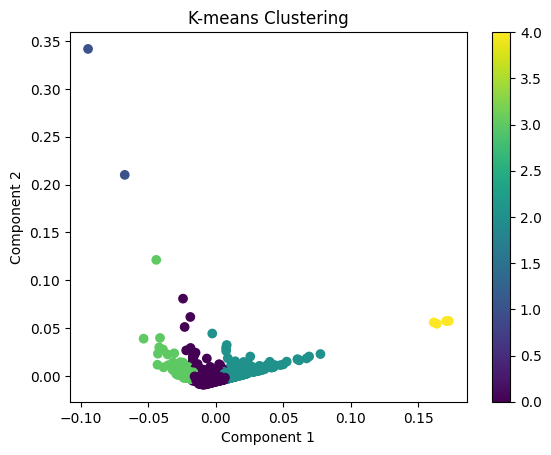

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 2차원으로 축소
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# 클러스터 시각화
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

In [17]:
# 각 클러스터의 특징을 분석하기 위해 클러스터링된 데이터를 그룹화합니다.
cluster_features = df.groupby('K_means_5')[['a_n_w', 'b_n_w', 'c_n_w', 'd_n_w', 'e_n_w', 'f_n_w', 'Dist_n_w', 'Pop_n_w', 'build_n_w',"Pop_s_n_w","Usage_n_w"]].mean()

# 각 클러스터의 크기를 계산합니다.
cluster_sizes = df['K_means_5'].value_counts()

# 각 클러스터별로 특징을 출력합니다.
for cluster, features in cluster_features.iterrows():
    print(f"Cluster {cluster}:")  # 클러스터 번호 출력
    print(f"Cluster Size: {cluster_sizes[cluster]}")  # 클러스터 크기 출력
    print("Cluster Features:")  # 클러스터의 변수별 특징 출력
    for feature, value in features.items():
        print(f"- {feature}: {value*100000}")  # 변수명과 해당 변수의 평균값 출력
    print("--------------------")


Cluster 0:
Cluster Size: 688
Cluster Features:
- a_n_w: 38.530655391120455
- b_n_w: 199.12790697674473
- c_n_w: 80.0271739130435
- d_n_w: 31.952468806136874
- e_n_w: 11.191020298427159
- f_n_w: 31.952468806136874
- Dist_n_w: 949.0241867996868
- Pop_n_w: 71.71883257186197
- build_n_w: 352.2889894006964
- Pop_s_n_w: 158.60610383505468
- Usage_n_w: 14.216499461407622
--------------------
Cluster 1:
Cluster Size: 2
Cluster Features:
- a_n_w: 0.0
- b_n_w: 111.111111111112
- c_n_w: 123.9130434782612
- d_n_w: 13.1524008350733
- e_n_w: 0.0
- f_n_w: 13.1524008350733
- Dist_n_w: 1416.5466122423886
- Pop_n_w: 175.1934711019375
- build_n_w: 29918.394303067023
- Pop_s_n_w: 0.0
- Usage_n_w: 0.0
--------------------
Cluster 2:
Cluster Size: 258
Cluster Features:
- a_n_w: 6.9062720225510645
- b_n_w: 166.23600344530647
- c_n_w: 24.494438827098104
- d_n_w: 5.40369956789829
- e_n_w: 0.3584711206703256
- f_n_w: 5.40369956789829
- Dist_n_w: 3287.684569020086
- Pop_n_w: 17.254850507081986
- build_n_w: 250.3

gpt에게 물어봐서 각 클러스터들의 특성을 알려달라고 했습니다. 아래는 그 답변입니다.   



Cluster 0:

주요 특징: 관광지 개수와 건축물 연면적이 높고, 편의시설의 수가 상대적으로 높음.   
유망 요소: 관광지 밀집, 건축물 연면적이 크고 주차 공간이 충분한 지역.

Cluster 1:

주요 특징: 관광지 개수가 적으며, 건축물 연면적과 주거지 개수가 중간 정도 수준.   
유망 요소: 상업시설과 주거지의 균형이 잘 이루어진 지역.

Cluster 2:

주요 특징: 전기차 충전소까지의 거리가 가장 가깝고, 관광지 개수와 건축물 연면적이 상대적으로 낮음.    
유망 요소: 주거지와 교통시설 개수가 적절한 균형을 이룬 지역.

Cluster 3:

주요 특징: 전기차 충전소까지의 거리가 멀고, 관광지와 건축물 연면적이 큼.    
유망 요소: 관광지와 건축물이 밀집한 지역으로 전기차 충전소로 적합할 수 있음.

Cluster 4:
  
주요 특징: 건축물 연면적이 매우 크고, 주거지와 편의시설 개수가 낮음.   
유망 요소: 상업시설과 건축물 연면적이 큰 지역으로, 차량 소비자들에게 서비스를 제공할 수 있는 잠재력이 있음.    
이러한 특성을 종합적으로 고려하여 전기차 충전소의 최적 입지를 결정할 수 있습니다. 추가로 지역의 교통 인프라, 주변 환경, 인구 특성 등을 고려하여 종합적인 판단을 수행하는 것이 좋습니다.

In [18]:
df.head()

,gid,center_lat,center_lon,Usage,Usage_n,Dist,Dist_n,Pop,Pop_n,Pop_s,...,d_n_w,e_n_w,f_n_w,Pop_n_w,Pop_s_n_w,build_n_w,Usage_n_w,Dist_n_w,W,K_means_5
0,나나74a80b,874250.0,1480750.0,0.0,0.0,1423.466728,0.134869,0.000,0.000000,0.0,...,0.000038,0.0,0.000038,0.00000,0.000000,0.000000,0.0,0.027513,0.028699,2
1,나나75b78a,875750.0,1478250.0,0.0,0.0,1468.865487,0.139203,0.000,0.000000,97.0,...,0.000000,0.0,0.000000,0.00000,0.001130,0.001311,0.0,0.028397,0.033370,2
2,나나75b78b,875750.0,1478750.0,0.0,0.0,1691.043241,0.160417,53.215,0.004156,14.0,...,0.000075,0.0,0.000075,0.00037,0.000163,0.002419,0.0,0.032725,0.038645,2
3,나나75b79a,875750.0,1479250.0,0.0,0.0,1192.488258,0.112815,0.000,0.000000,0.0,...,0.000038,0.0,0.000038,0.00000,0.000000,0.001075,0.0,0.023014,0.025275,2
4,나나75b79b,875750.0,1479750.0,0.0,0.0,696.160040,0.065426,33.120,0.002586,0.0,...,0.000038,0.0,0.000038,0.00023,0.000000,0.003783,0.0,0.013347,0.018546,0


## **그냥 변수 사용** ##
---

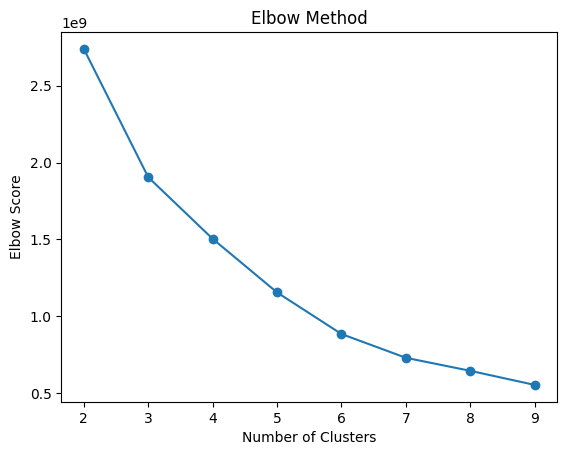

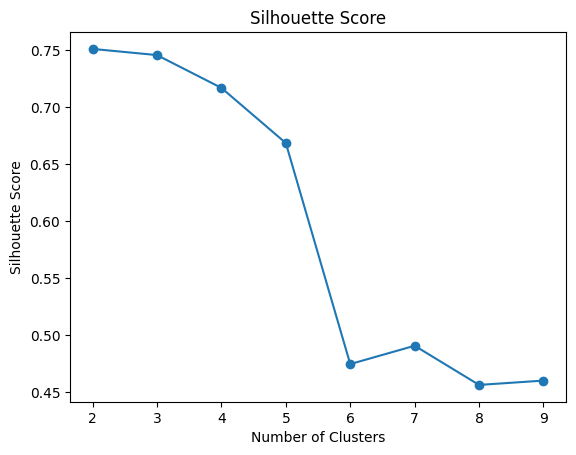

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 클러스터링에 사용할 특성(변수) 리스트 정의
features = ['a', 'b', 'c', 'd', 'e', 'f', 'Dist', 'Pop', 'build',"Usage","Pop_s"]

# 특성 데이터 추출
data = df[features]

# 클러스터 개수 범위 설정
cluster_range = range(2, 10)
elbow_scores = []
silhouette_scores = []

# 클러스터 개수에 따른 클러스터링 수행 및 평가
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)
    kmeans.fit(data)
    clusters = kmeans.predict(data)
    elbow_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, clusters))

# Elbow Method를 이용한 최적의 클러스터 개수 탐색
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method')
plt.show()

# Silhouette Score를 이용한 최적의 클러스터 개수 탐색
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [20]:
from sklearn.cluster import KMeans

# 클러스터링에 사용할 특성(변수) 리스트 정의
features = ['a', 'b', 'c', 'd', 'e', 'f', 'Dist', 'Pop', 'build',"Usage","Pop_s"]

# 특성 데이터 추출
data = df[features]

# K-means 클러스터링 객체 생성
kmeans = KMeans(n_clusters=3,n_init=10)

# 데이터를 이용하여 클러스터링 수행
kmeans.fit(data)

# 클러스터링 결과 예측
clusters = kmeans.predict(data)

# 클러스터 레이블을 데이터프레임에 추가
df['K_means_just'] = clusters

In [21]:
print(df.columns)
df['K_means_just'].value_counts()

Index(['gid', 'center_lat', 'center_lon', 'Usage', 'Usage_n', 'Dist', 'Dist_n',
       'Pop', 'Pop_n', 'Pop_s', 'Pop_s_n', 'build', 'build_n', 'a', 'a_n', 'b',
       'b_n', 'c', 'c_n', 'd', 'd_n', 'e', 'e_n', 'f', 'f_n', 'Weight',
       'geometry', 'a_n_w', 'b_n_w', 'c_n_w', 'd_n_w', 'e_n_w', 'f_n_w',
       'Pop_n_w', 'Pop_s_n_w', 'build_n_w', 'Usage_n_w', 'Dist_n_w', 'W',
       'K_means_5', 'K_means_just'],
      dtype='object')


1    946
0     84
2      2
Name: K_means_just, dtype: int64

In [22]:
from sklearn.metrics import silhouette_score

# 클러스터링 결과 데이터와 특성 데이터 준비
clusters = df['K_means_just']  # 클러스터링 결과
data = df[features]  # 특성 데이터

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data, clusters)

print("실루엣 점수:", silhouette_avg)

실루엣 점수: 0.745630283244709


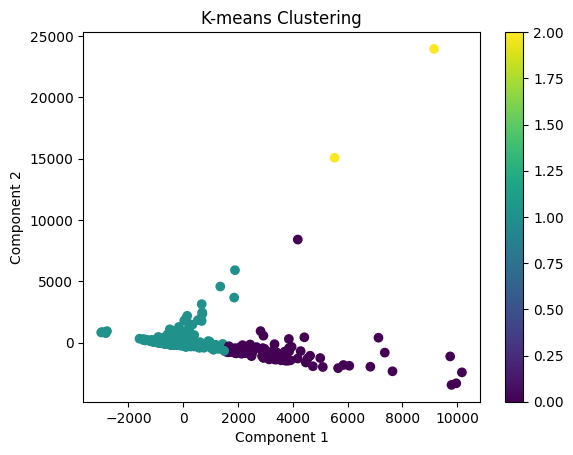

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 2차원으로 축소
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# 클러스터 시각화
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

In [24]:
# 각 클러스터의 특징을 분석하기 위해 클러스터링된 데이터를 그룹화합니다.
cluster_features = df.groupby('K_means_just')[['a', 'b', 'c', 'd', 'e', 'f', 'Dist', 'Pop', 'build',"Usage","Pop_s"]].mean()

# 각 클러스터의 크기를 계산합니다.
cluster_sizes = df['K_means_just'].value_counts()

# 각 클러스터별로 특징을 출력합니다.
for cluster, features in cluster_features.iterrows():
    print(f"Cluster {cluster}:")  # 클러스터 번호 출력
    print(f"Cluster Size: {cluster_sizes[cluster]}")  # 클러스터 크기 출력
    print("Cluster Features:")  # 클러스터의 변수별 특징 출력
    for feature, value in features.items():
        print(f"- {feature}: {value*100000}")  # 변수명과 해당 변수의 평균값 출력
    print("--------------------")


Cluster 0:
Cluster Size: 84
Cluster Features:
- a: 3409523.8095238097
- b: 80952.38095238095
- c: 1696428.5714285716
- d: 3965476.1904761903
- e: 5653571.428571428
- f: 15147619.047619049
- Dist: 18934483.081807844
- Pop: 272977071.42857146
- build: 85393535.7142857
- Usage: 4469.668577307467
- Pop_s: 307233333.3333334
--------------------
Cluster 1:
Cluster Size: 946
Cluster Features:
- a: 162367.86469344608
- b: 171035.94080338266
- c: 152114.16490486258
- d: 203382.66384778012
- e: 64059.19661733616
- f: 630126.8498942917
- Dist: 86755689.23574543
- Pop: 6830538.054968288
- build: 22662081.39534884
- Usage: 312.44004972202646
- Pop_s: 10559196.617336152
--------------------
Cluster 2:
Cluster Size: 2
Cluster Features:
- a: 0.0
- b: 100000.0
- c: 300000.0
- d: 0.0
- e: 0.0
- f: 350000.0
- Dist: 73818320.19307142
- Pop: 25207250.000000004
- build: 2114862000.0000002
- Usage: 0.0
- Pop_s: 0.0
--------------------


### 그 외 ###
---

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gid           1032 non-null   object 
 1   center_lat    1032 non-null   float64
 2   center_lon    1032 non-null   float64
 3   Usage         1032 non-null   float64
 4   Usage_n       1032 non-null   float64
 5   Dist          1032 non-null   float64
 6   Dist_n        1032 non-null   float64
 7   Pop           1032 non-null   float64
 8   Pop_n         1032 non-null   float64
 9   Pop_s         1032 non-null   float64
 10  Pop_s_n       1032 non-null   float64
 11  build         1032 non-null   float64
 12  build_n       1032 non-null   float64
 13  a             1032 non-null   float64
 14  a_n           1032 non-null   float64
 15  b             1032 non-null   float64
 16  b_n           1032 non-null   float64
 17  c             1032 non-null   float64
 18  c_n           1032 non-null 

In [27]:
df.sort_values("Weight",ascending=False)[["gid","Weight"]].head()

,gid,Weight
856,다나46b93b,0.394351
499,다나05b99a,0.244389
255,나나89b79b,0.240815
870,다다05a00a,0.214322
135,나나84b58b,0.206429


In [29]:
len(df)

1032